### Simplifying problem using agglomerative clustering

In [1]:
import pandas as pd

pd.options.display.max_columns = 200

songs = pd.read_csv('data/spotify_data.csv', index_col=[0])
songs = songs.drop_duplicates(['album_name', 'track_name'])
# Drop rows with missing values
songs.dropna(inplace=True)
songs.reset_index(inplace=True)
# Drop non-numerical attributes
songs = songs.drop(columns = ["track_id", "artists", "album_name", "track_name"])
# Convert boolean column to int
songs['explicit'] = songs['explicit'].astype(int)

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Use aggreagted dataset to perform agglomerative clustering (its faster than on the full datset)
agg_df = songs.groupby('track_genre').agg({
    'popularity': 'median',
    'duration_ms': 'mean',
    'explicit':'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'key': 'mode',
    'loudness': 'mean',
    'mode': 'mode',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'time_signature': 'mode'
}).reset_index()
# Normalize data before clustering since clustering relies on distances
scaler = MinMaxScaler()
agg_df[['duration_ms', 'popularity', 'tempo', 'time_signature', 'loudness', 'key']] = scaler.fit_transform(agg_df[['duration_ms', 'popularity', 'tempo', 'time_signature', 'loudness', 'key']])
agg_df.head()

,track_genre,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,acoustic,0.701639,0.340700,0.549435,0.435997,0.468188,0.721122,0.813765,0.043333,0.565922,0.038801,0.153737,0.425066,0.484441,0.796824
1,afrobeat,0.388270,0.479967,0.669683,0.703366,0.770811,0.803065,0.511066,0.085662,0.270257,0.254148,0.184886,0.699081,0.488967,0.857514
2,alt-rock,0.558216,0.426684,0.535458,0.754099,0.886385,0.881268,0.638105,0.055152,0.122093,0.054355,0.210136,0.518557,0.565251,0.850022
3,alternative,0.352216,0.305809,0.599122,0.682673,0.448190,0.888133,0.516209,0.093858,0.185828,0.017421,0.210749,0.481479,0.500264,0.865284
4,ambient,0.734409,0.433042,0.367920,0.236781,0.397685,0.271536,0.619238,0.041556,0.777430,0.676671,0.128898,0.167327,0.373846,0.549531


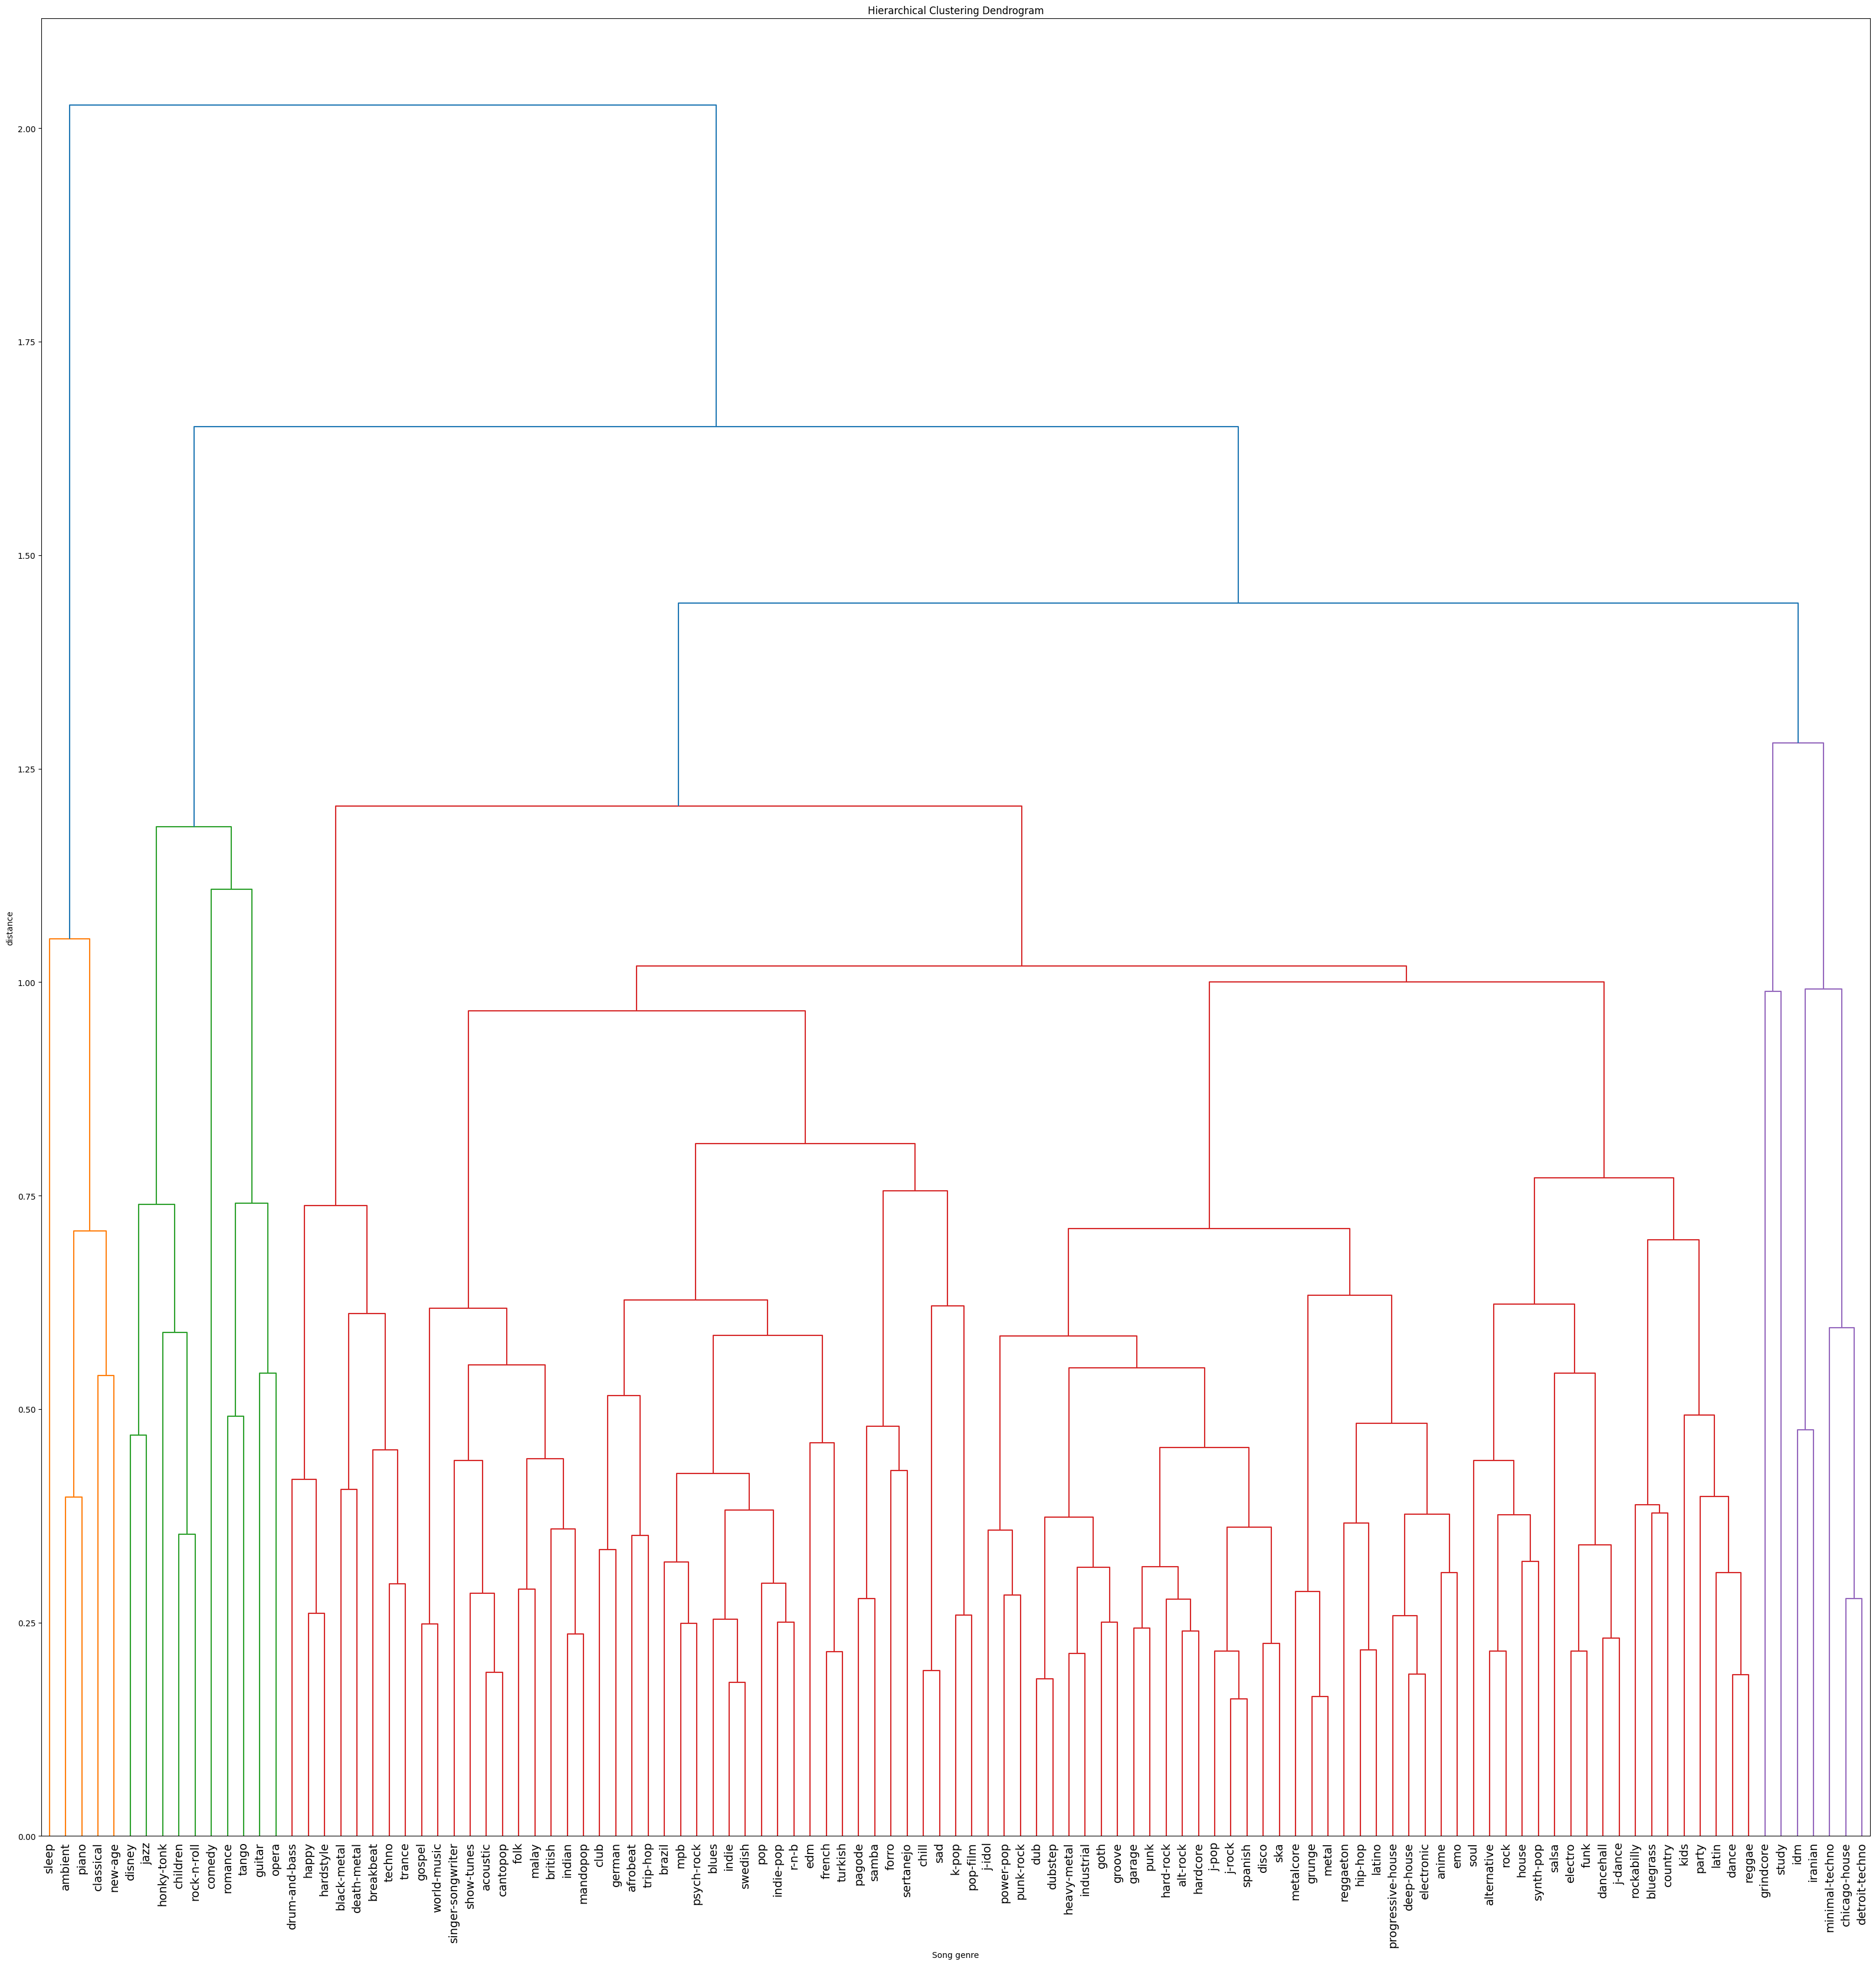

In [45]:
# import dendrogram and linkage from scipy
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
cluster_data = agg_df.drop(columns=['track_genre'])
# create the hierarchical clustering
Z = linkage(cluster_data, 'complete')

# plot the dendrogram
dendrogram(Z, labels=list(agg_df['track_genre']))
plt.rcParams['figure.figsize'] = [40, 40]
# set the plot title
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Song genre')
plt.ylabel('distance')
plt.xticks(fontsize=14)
plt.show()

### Attempt to group genres based on clusters found

In [34]:
from sklearn.cluster import AgglomerativeClustering

# create the clusterer
agg = AgglomerativeClustering(n_clusters = 30, linkage='average')

# create the clusters
clusters = agg.fit_predict(cluster_data)
genres = agg_df['track_genre']
cluster_to_genres = {}
for i, cluster in enumerate(clusters):
    if cluster not in cluster_to_genres:
        cluster_to_genres[cluster] = set()
    cluster_to_genres[cluster].add(genres[i])
cluster_to_genres

{10: {'acoustic',
  'brazil',
  'british',
  'cantopop',
  'folk',
  'gospel',
  'indian',
  'malay',
  'mandopop',
  'show-tunes',
  'singer-songwriter',
  'world-music'},
 6: {'afrobeat', 'club', 'german', 'trip-hop'},
 1: {'alt-rock',
  'anime',
  'blues',
  'deep-house',
  'disco',
  'dub',
  'dubstep',
  'edm',
  'electronic',
  'emo',
  'french',
  'garage',
  'goth',
  'groove',
  'hard-rock',
  'hardcore',
  'heavy-metal',
  'hip-hop',
  'indie',
  'indie-pop',
  'industrial',
  'j-pop',
  'j-rock',
  'latino',
  'mpb',
  'pop',
  'progressive-house',
  'psych-rock',
  'punk',
  'r-n-b',
  'reggaeton',
  'rockabilly',
  'ska',
  'spanish',
  'swedish',
  'turkish'},
 4: {'alternative',
  'dance',
  'dancehall',
  'electro',
  'funk',
  'house',
  'j-dance',
  'kids',
  'latin',
  'reggae',
  'rock',
  'synth-pop'},
 25: {'ambient', 'piano'},
 7: {'black-metal', 'death-metal'},
 16: {'bluegrass', 'country'},
 3: {'breakbeat', 'techno', 'trance'},
 18: {'chicago-house', 'detroit-

### Manual grouping based on dendrogram (20 genres)
* Hand-crafted the following grouping based on the info on the dendrogram and by googling the parent genres of each genre
* Couldn't find genre-groupings for some of the genres (I left these on their own cluster)

In [74]:
genre_mapping = {
    'sleep': set(['sleep']),
    'comedy': set(['comedy']),
    'ambient': set(['ambient', 'piano', 'guitar', 'study', 'sad', 'chill', 'new-age', 'sleep']),
    'children': set(['children', 'kids']),
    'classical': set(['classical', 'opera', 'romance']),
    'show-tunes': set(['disney', 'show-tunes', 'singer-songwriter', 'songwriter']),
    'folk': set(['folk', 'gospel', 'jazz', 'soul', 'funk', 'afrobeat', 'blues', 'r-n-b', 'groove', 'disco']),
    'country': set(['honky-tonk', 'bluegrass', 'country']),
    'pop': set(['pop', 'indie-pop', 'pop-film', 'k-pop', 'j-idol', 'j-pop', 'power-pop']),
    'rock': set(['indie', 'rock-n-roll', 'punk-rock', 'rock', 'alternative', 'j-rock', 'rockabilly', 'psych-rock', 'goth', 'punk', 'hard-rock', 'alt-rock', 'hardcore', 'emo']),
    'hip-hop': set(['trip-hop', 'hip-hop']),
    'metal': set(['grindcore', 'metalcore', 'grunge', 'metal', 'black-metal', 'death-metal', 'heavy-metal']),
    'edm': set(['idm', 'edm', 'party', 'dance', 'j-dance', 'club', 'garage', 'electronic', 'electro', 'synth-pop', 'club', 'dubstep', 'industrial', 'drum-and-bass', 'hardstyle', 'happy']),
    'techno': set(['techno', 'minimal-techno', 'chicago-house', 'house', 'progressive-house', 'deep-house', 'detroit-techno', 'breakbeat', 'trance']),
    'world': set(['world-music', 'mandopop', 'cantopop', 'malay', 'indian', 'iranian']),
    'european': set(['british', 'german', 'french', 'swedish', 'turkish']),
    'latin': set(['latin', 'latino', 'salsa', 'tango', 'spanish', 'reggaeton', 'brazil', 'sertanejo', 'forro', 'pagode', 'samba', 'mpb']),
    'reggae': set(['reggae', 'ska', 'dub', 'dancehall']),
    'acoustic': set(['acoustic']),
    'anime': set(['anime'])
}

In [75]:
# Check that I didn't forget or misspell any of the original music genres
for genre in songs['track_genre'].unique():
    found = False
    for subgenres in genre_mapping.values():
        if genre in subgenres:
            found = True
            break
    if not found:
        print(f'Missing or misspelled genre: {genre}')

In [76]:
# Apply new genre groupping to entire dataset
songs = pd.read_csv('data/spotify_data.csv', index_col=[0])
print(f"Unique genres before transformation: {len(songs['track_genre'].unique())}")

Unique genres before transformation: 114


In [77]:
modified_genres = []
for i in range(len(songs)):
    genre = songs['track_genre'].iloc[i]
    for parent_genre, sub_genres in genre_mapping.items():
        if genre in sub_genres:
            modified_genres.append(parent_genre)
            break
songs['track_genre'] = modified_genres
print(f"Unique genres after transformation: {len(songs['track_genre'].unique())}")

Unique genres after transformation: 20


In [78]:
# Save new dataset
songs.to_csv('data/spotify_data_simplified.csv')